In [52]:

    We started this project with the goal to work a social distancing method on an infected population.This simulation would 
show 90% of our population stop moving after a certian number of runs and the remaining 10% would move with a signifcantly 
reduced speed. We also considered testing the size of the population to a potential difference in results before cutting 
the idea to focus on speed of infection. To accomplish this goal, we decied to use the deer diffusion model/deer cabbage 
procreate model. Since we wanted to show how much "slower" the spread of coronavirus would be when most of our population 
isn't moving, or at a reduced speed, we started off with one infected dot within it's community. Within the model, we set 
all parameters but one are set at sensible values. We developed our enclosure to be square, with "closed" boarders (with 
walls and corners) instead of toroidal boarders. To influence the speed, we changed the value of two of our parameters. We 
added a conditional statement inside the loop that changed the vmin value of 0.01 to 0.001 and the v_decay value of 0.7 to 
a 0.001 ater a set number of runs. We tried to add anothe rstatement to stop all motion of individuals after a certina number
of them were infected, but we did not recieve successful results.


SyntaxError: invalid syntax (<ipython-input-52-49fd0863fe7e>, line 3)

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

In [69]:
# Define constants
class Const: # Carefree remote-eating cheaters
    def __init__(self):
        self.n_animals_max = 500
        self.n_animals_start = 250 # Original n_animals
        self.n_steps = 500
        self.n_steps_quarentine = 200
        self.vmin = 0.01
        self.qmin = 0.001
        self.vmax = 5*self.vmin
        self.v_decay = 0.7
        self.arena_size = 4
        self.hp_baby = 20
        self.hp_reproduction = 35
        self.hp_birthcost = 30        
        self.hp_leak = 0.5
        self.contagion_distance = 0.01**2
        

In [70]:
# Build the experimental model (social distancing methods implemented)
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, c.n_steps_quarentine, n_trials))

    for i_trial in range(n_trials):
        # Allocate hp for all animals, but only first few are alive
        hp = np.zeros(c.n_animals_max)
        hp[:c.n_animals_start] = np.random.uniform(
            low=c.hp_baby, high=c.hp_reproduction, size=c.n_animals_start)
        
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals_max)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals_max)
        vx = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        infected = np.zeros(c.n_animals_max)
        infected[0] = 1 #Patient zero 
    
    
        n_animals = np.zeros(c.n_steps)

        if show_dotses: # Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy
            
            vx = vx*c.v_decay + np.random.randn(c.n_animals_max)*c.vmin 
            vy = vy*c.v_decay + np.random.randn(c.n_animals_max)*c.vmin
            # Make them run around (keeps speed somewhat randomized)
            
            #reduce speed of deer after 150 steps
            if c.n_steps < 150:       
                self.vmin=0.001
                self.v.decay = 0.01
            #if infected[victims]>50:    -----# This didnt work within the same loop or in diff one
                #speed= 0
                
            # Reflect from the walls
            vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
            vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, c.arena_size)) # Keep them in enclosure
            y = np.maximum(0,np.minimum(y, c.arena_size))
            
            for i_animal in range(c.n_animals_max):
                if infected[i_animal]==1:
                    d = np.square(x-x[i_animal]) + np.square(y-y[i_animal])
                    victims = np.argwhere(d < c.contagion_distance)
                    infected[victims] = 1
            
            potential_babies = np.argwhere(hp<=0)
            baby_counter = 0
            for i_animal in np.argwhere(hp>0): # <---- This gains about a second of performance                    
        
                if hp[i_animal]>=c.hp_reproduction: # <---------- Healthy enough to have a baby
                    hp[i_animal] -= c.hp_birthcost                 
                    if baby_counter < len(potential_babies): # There are still baby-slots on the list
                        ind = potential_babies[baby_counter] # Shortcut
                        baby_counter += 1                    # Count the baby
                        hp[ind] = c.hp_baby
                        x[ind] = x[i_animal]
                        y[ind] = y[i_animal]
                        vx[ind] = vx[i_animal]
                        vy[ind] = vy[i_animal]
           
            n_animals[t] = np.sum(hp>0)
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[hp>0], y[hp>0], 'k.',markersize=2);
                plt.plot(x[infected==0],y[infected==0],'k.', markersize=2)
                plt.plot(x[infected==1],y[infected==1],'r.', markersize=2)
                plt.xlim((0,c.arena_size))
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)

            else:
                print('.',end='')
        # --- Time loop is over

        #history[:,i_trial] = n_animals
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


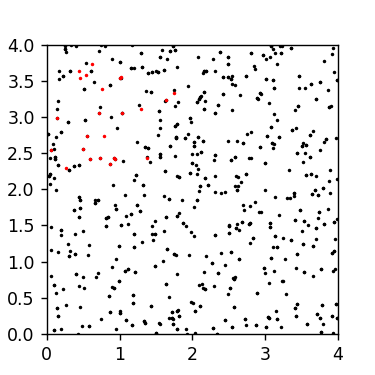

Wall time: 28.3 s


In [71]:
c = Const()
np.random.seed(1)
%time curve = model(c, show_dotses=True);

In [ ]:

    To accomplish this goal, we used the deer diffusion model/deer cabbage procreate model. We ultimately could not figure 
out how to seperate the population unitl two groups, we focused on reduing the speed. Since we wanted to show how much 
"slower" the spread of coronavirus would be when most of our population isn't moving, or at a reduced speed, we started
off with one infected dot within it's community. Within the model, we set all parameters but one are set at sensible values.
We developed our enclosure to be square, with "closed" boarders (with walls and corners) instead of toroidal boarders. To 
influence the speed, we changed the value of two of our parameters. We added a conditional statement inside the loop that 
changed the vmin value of 0.01 to 0.001 and the v_decay value of 0.7 to a 0.001 ater a set number of runs. We tried to add
another statement to stop all motion of individuals after a set number(around 50) of them were infected, but we did not 
recieve successful results. 
    In the end, the rate of infected was reduced. Visualy, the entirety of the control group population was infected. In the 
experimental group, only 1/4 of the population was infected. 